#  <center> RECONOCIMIENTO DE LA PUPILA<center>

## CONTEXTO

### Argumento del Proyecto

La discapacidad motriz es esa deficiencia que causa una disfunción en el aparato locomotor del individuo, teniendo consecuencia a nivel de postura, desplazamiento o en la coordinación de los movimientos corporales.

Las personas que tienen esta discapacidad pueden enfrentarse a problemas como: movimientos involuntarios, alcance limitado, reducción en su fuerza, dificultades de coordinación, además de dificultades en la motricidad fina y gruesa. Todas estas dificultades tienen como consecuencia una mala accesibilidad al medio físico donde se desenvuelven.
Las personas con discapacidad motora en los miembros superiores, requieren productos de apoyo para interactuar con los computadores, los cuales les permitan controlar las diferentes aplicaciones sin necesitar el movimiento de sus extremidades superiores o de la colaboración de otra persona

Buscando aportar al proceso de inclusión social e independencia de las personas con discapacidad motora en sus miembros superiores, que además  conservan movilidad reducida de el cuello y cabeza, se plantea un prototipo que permite controlar el cambio de páginas de un libro electrónico de acuerdo con el movimiento de los ojos del usuario, usando técnicas de Visión Artificial  los cuales evitan  sensores o cables entre el computador y el usuario.
el prototipo se plantea para funcionar en computadores , celulares e incluso tablets,usando la cámara que se encarga de capturar las imágenes, mediante un programa las imágenes son procesadas, analizadas, interpretadas y se toma una decisión acerca de qué acciones se deben tomar.
actualmente existen librerías robustas las cuales logran detectar caras, y partes de la cara , el proyecto se basará en estas librerías para extraer información de la cara y luego mediante procesamiento se hará un seguimiento a la pupila del ojo.




### Sobre el proyecto
El proyecto consiste en detectar a partir de la videocaptura de un rostro la ubicacion de los ojos, hacerle un seguimiento y posteriormente evaluar diferentes acciones que el usuario pueda realizar a traves de los movimientos que realice con los ojos. Es importante mencionar que la videocaptura se realizara por medio de un celular o camara para computadores por lo que utilizamos como referencia una camara generica Huawei con las siguientes caracteristicas:

8 MP, f/2.0

Estos parametros son invariables y debemos trabajar con ellos por medio de preprocesamiento para poder llegar a una etapa de segmentacion exitosa a futuro.

### Sobre la adquisicion y el preprocesmiento
Idealmente nosotros haremos en una etapa posterior un proceso de Machine Learning que nos permita separar los ojos del fondo y todos los elementos externos que puedan generar ruido, por esta razon partiremos para la adquisicion y el procesamiento de la base anteriormente mensionada y nos enfocaremos en tratar imagenes y videos que contengan unicamente el ojo y sus alrederoros mas cercanos para determinar los mejores filtros y funciones a utilizar. 




## ADQUISICION

### Metodo de adquisicion

La adquisicon sera un proceso sencillo puesto que no podemos reparar en las condiciones ambientales, las caracteristicas de los elementos de obtencion o la calidad final de la imagen, es por esta razon que hemos obtado por un proceso de Machine Learning para segmentar de la imagen completa solamente lo que nos interesa, la adquisicion se hara atraves de camaras de celulares o camaras de portatiles o usb, estas camaras tienen una gran variedad de caracteristicas distintas, estas camaras nos entregaran video a que trataremos a 30fps frame por frame. 

Las imagenes que obtendremos del rostro y los ojos sera paralela al rostro como se muestra en la figura 1. 

<center><i>Figura 1. Esquema de imagenes a obtener.</i></center>
<img src="entrega/1.png" alt="sensor digital" style="width:700px">

y una vez se haya aplicado el proceso de Machine Learning y se obtenga de la imagen solo aquello que nos interesa tendremos una imagen del estilo de la figura 2.

<center><i>Figura 2. Segmentacion por Machine Learning.</i></center>
<img src="entrega/2.png" alt="sensor digital" style="width:300px">



### Fase de exploración

In [1]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math


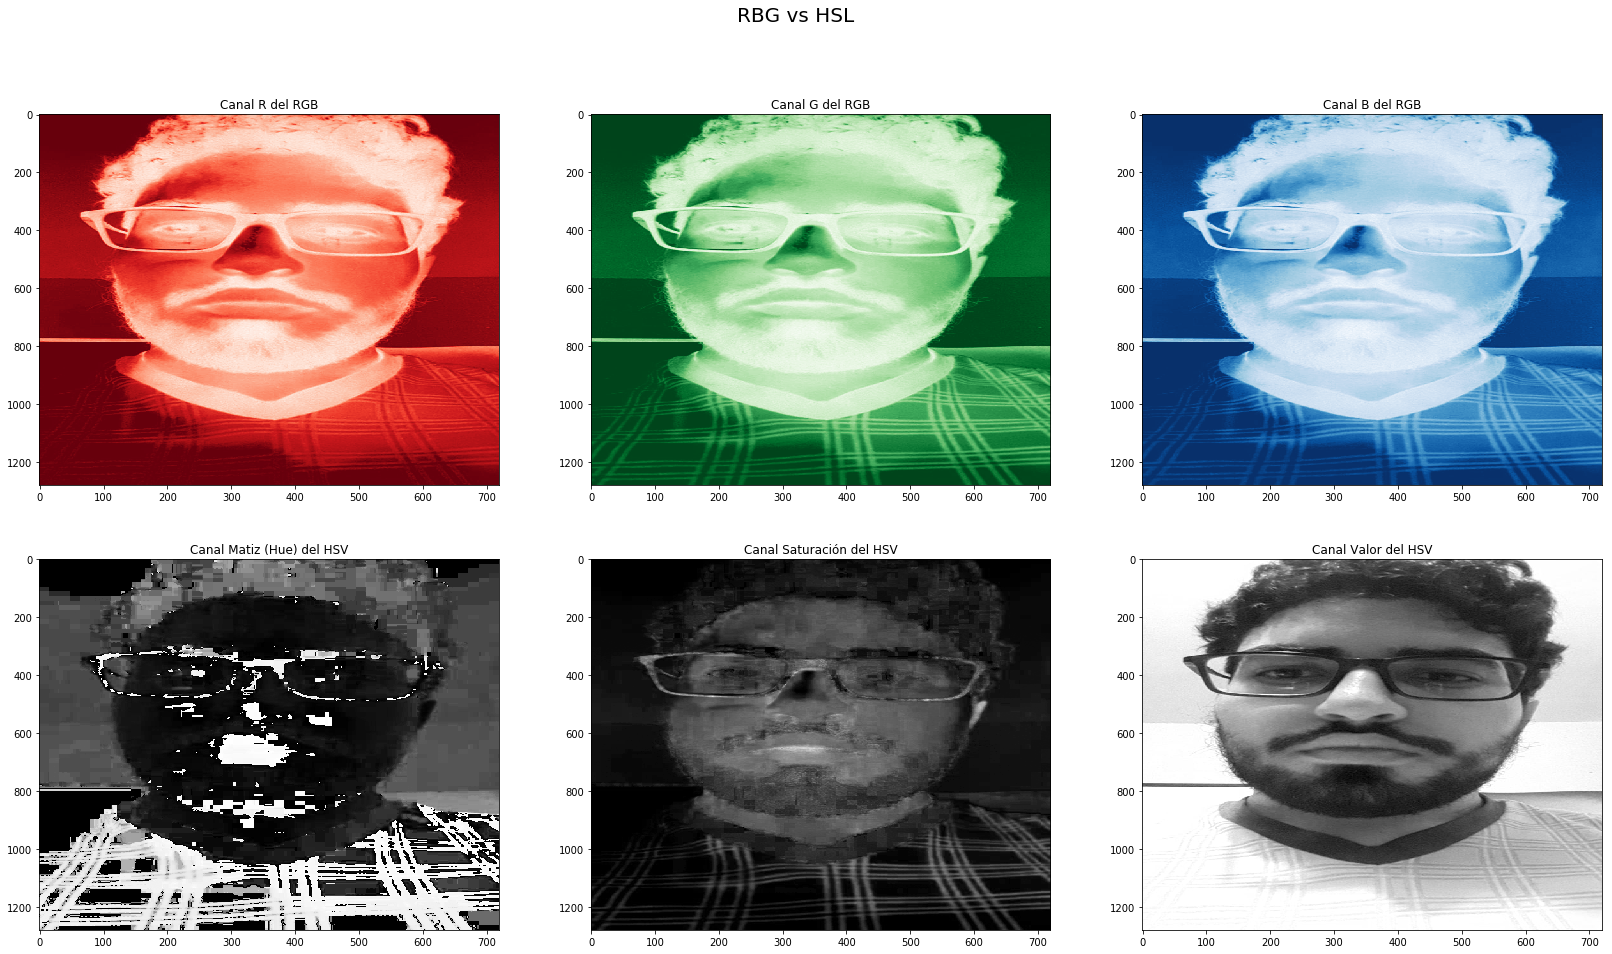

In [2]:
img = cv2.imread("res/test0.jpeg")
img_t = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img[:,:,0], cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img[:,:,1], cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img[:,:,2], cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_t[:,:,0], cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_t[:,:,1], cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_t[:,:,2], cmap='gray', aspect='auto')

In [2]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

def printColorImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    colors = ('r','g','b')
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img)
    arreglo_plots[1].set_title('Histograma')
    for i,col in enumerate(colors):
        img_array_i = img[:,:,i].ravel()
        arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0), color=colors[i])
        
def printGrayImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img.ravel(), bins=256, range=(0.0, 255.0))
    
def printNegativeImage(img, maintTitle = '', imgTitle='', subs = 0, add = 0):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    
    img1_subtract= np.zeros(img.shape, np.uint8)
    img1_subtract = cv2.subtract(255, img)
    img1_subtract = cv2.subtract(img1_subtract,subs)
    img1_subtract = cv2.add(img1_subtract,add)

    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img1_subtract, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img1_subtract.ravel(), bins=256, range=(0.0, 255.0))
    
def printImageAndHist(imgPath, maintTitle = '', imgTitle='', mode='color', subs = 0, add = 0):
    if( mode == 'color'):
        img = img_read(imgPath)
        printColorImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        img = img_read(imgPath,'grayscale')
        printGrayImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='negative'):
        img = img_read(imgPath,'grayscale')
        printNegativeImage(img,maintTitle,imgTitle, subs, add)

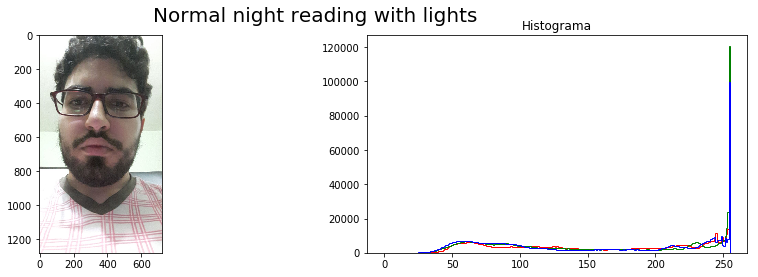

In [4]:
printImageAndHist("res/test0.jpeg", 'Normal night reading with lights')

C:\Users\Usuario\Anaconda3\envs\dlib\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


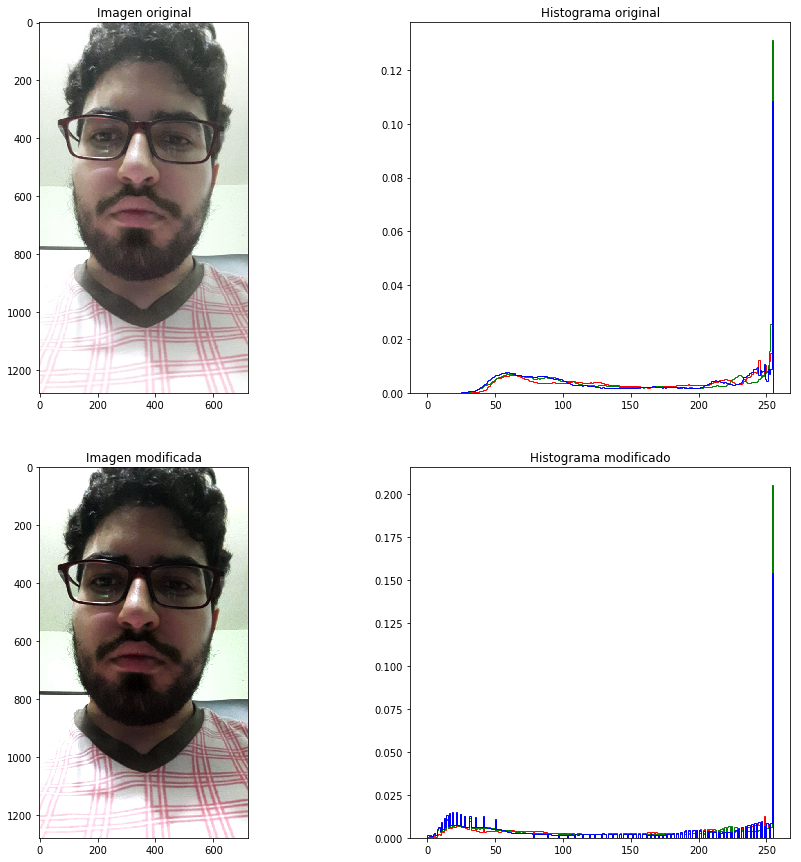

In [3]:
def apply_f_on_rgb(img, f, args):
    
    res = np.zeros(img.shape, np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def non_linear_parabola(img, a, b, c):
    
    img_copy = img.astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,2)
    res_a = cv2.multiply(res_a,a)
    res_b = cv2.multiply(img_copy,b)
    res = cv2.add(res_a, res_b)
    res = cv2.add(res, c)
    res[res < 0 ] = 0
    res = res*255
    res[res > 255] = 255
    res = res.astype(np.uint8)
    
    return res

img = cv2.cvtColor(cv2.imread('res/test0.jpeg'), cv2.COLOR_BGR2RGB)

a = 0.7
b = 0.4
c = -0.05


res = apply_f_on_rgb(img, non_linear_parabola, [a, b, c])

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

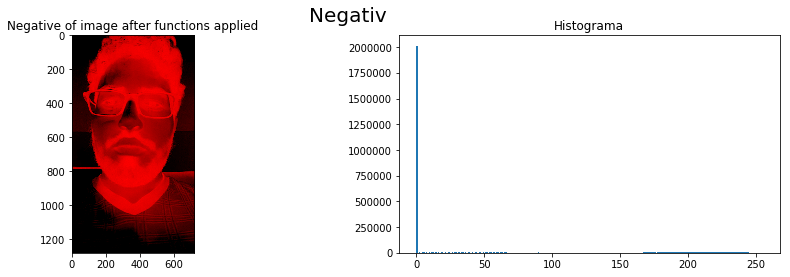

In [6]:
img_t = res
printNegativeImage(img_t, maintTitle = 'Negativ', imgTitle='Negative of image after functions applied', subs = 0, add = 0)

<Figure size 432x288 with 0 Axes>

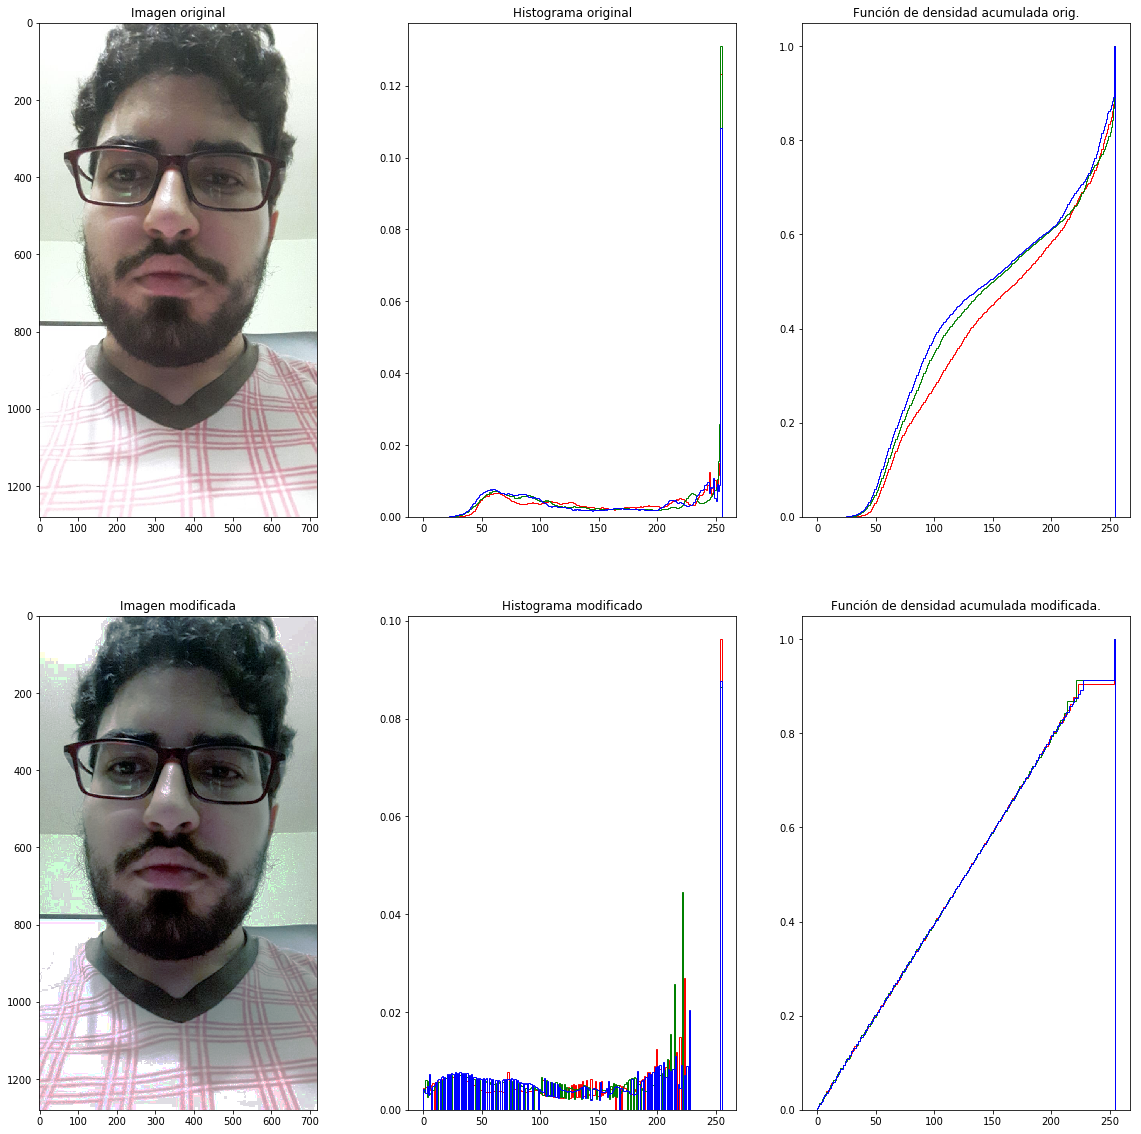

In [4]:
def histogram_equalization(img):
    
    res = np.zeros(img.shape, np.float32)
    img_raveled = img.ravel()
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmin = 0
    gmax = np.max(img)
    gmax = 255
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin

    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

    
img = cv2.cvtColor(cv2.imread('res/test0.jpeg'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

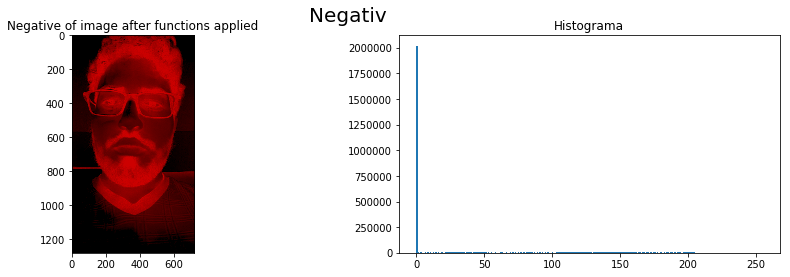

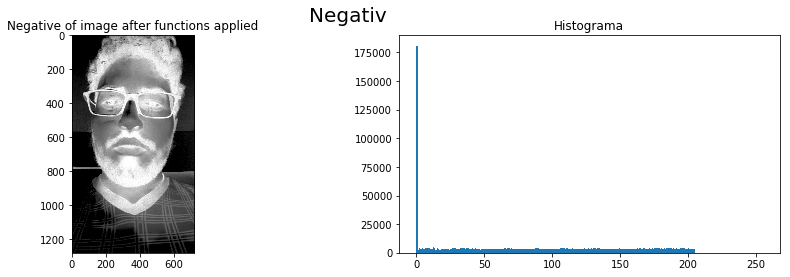

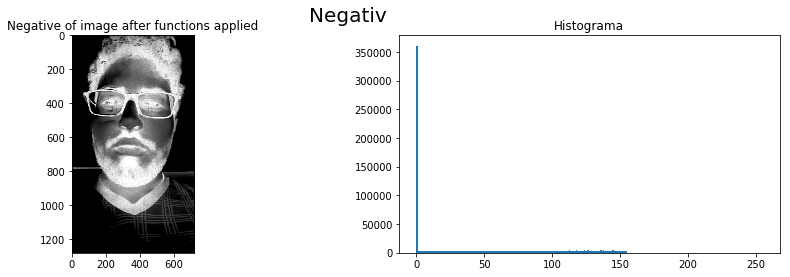

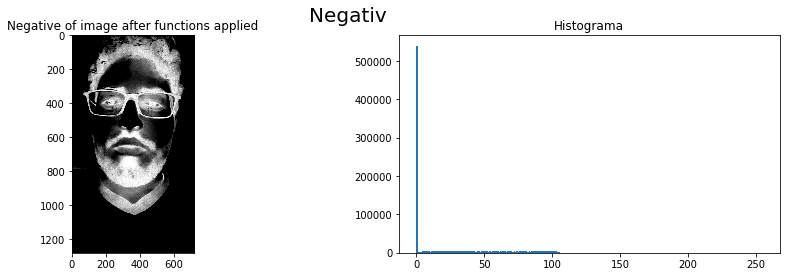

In [8]:
img_t = res

img_g = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

printNegativeImage(img_t, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 50, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 50, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 100, add = 0)

printNegativeImage(img_g, maintTitle = 'Negativ', 
                   imgTitle='Negative of image after functions applied', subs = 150, add = 0)

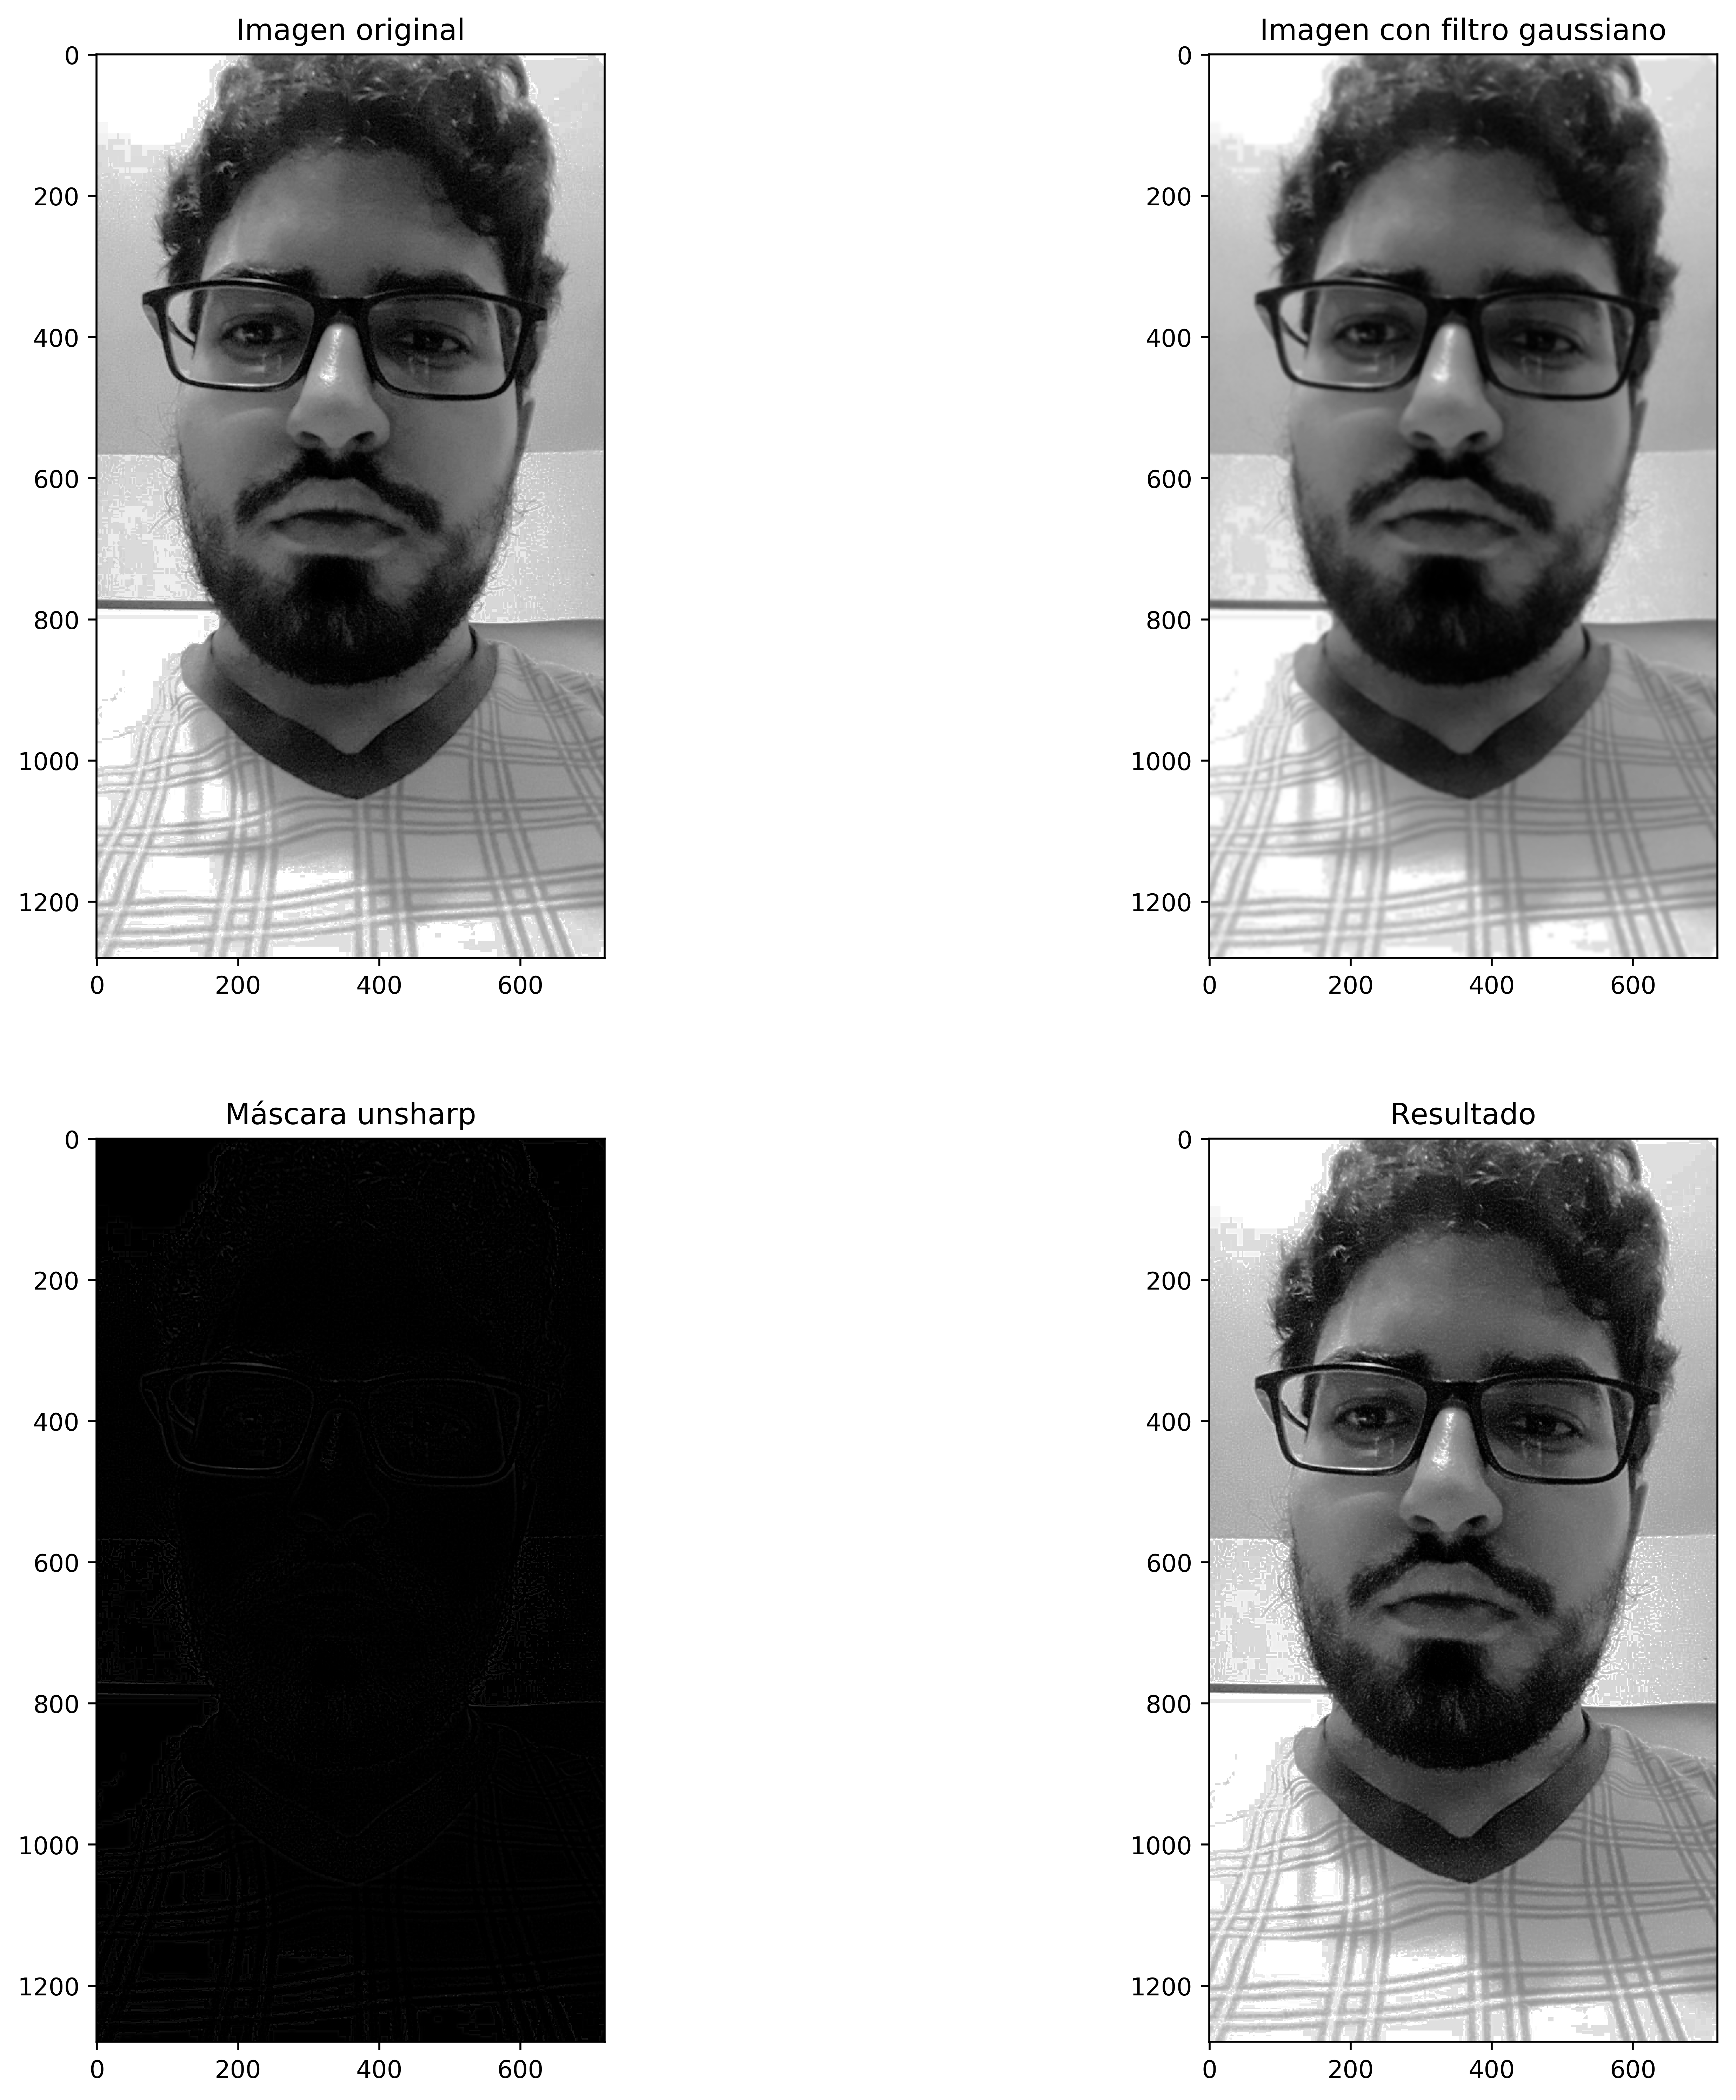

In [22]:

#Se genera un kernel de tamaño size.
#Se devuelve el radio del kernel r.
#Se devuelve el kernel como tal, dividido entre
#la cantidad total de posiciones en este: size^2.
def make_kernel(k_size):
    kernel = np.ones((k_size, k_size),
                     dtype=np.float32) #Generamos un kernel con tipo de dato float
                                                        #para poder almacenar datos reales.
    r = math.floor(k_size/2)           #El radio del kernel se obtiene redondenado hacia abajo
                                        #la división del tamaño del kernel sobre dos.
    return r,kernel/(k_size**2)


img = img_g
k_size = 9
(r, kernel) = make_kernel(k_size)

#Creamos una imagen destino para la convolución, del mismo tamaño que la original.
res = np.zeros(img.shape, dtype=np.float32)

#Para cada píxel se recorre un vecindario con un rango de
#r píxeles a la izquierda, a la derecha, arriba y 
#abajo del mismo.
def apply_kernel(img, res, x,y,kernel,r):
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]



#Se le aplica a la imagen un filtro Gaussiano con un kernel de tamaño k_size x k_size, 
#y con un sigma de 2.
gaussian = cv2.GaussianBlur(img_g, (k_size,k_size), 2)
mascara_unsharp = cv2.subtract(img_g, gaussian)
res = cv2.add(img_g, mascara_unsharp)

fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15), dpi = 500)

arreglo_plots[0][0].set_title('Imagen original')
arreglo_plots[0][0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[0][1].set_title('Imagen con filtro gaussiano')
arreglo_plots[0][1].imshow(gaussian, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1][0].set_title('Máscara unsharp')
arreglo_plots[1][0].imshow(mascara_unsharp, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1][1].set_title('Resultado')
arreglo_plots[1][1].imshow(res, cmap="gray", vmin=0, vmax=255)

In [23]:
img = img_g.astype(np.float32)

#Generamos un kernel para la dirección x y otro para y.

kernel_x=np.array([[0,0,0],
                   [0,-1,1],
                   [0,0,0]],dtype=np.float32)

kernel_y=np.array([[0,0,0],
                   [0,-1,0],
                   [0,1,0]],dtype=np.float32)

imgc1 = cv2.filter2D(img, ddepth= -1, kernel = kernel_x)
imgc2 = cv2.filter2D(img, ddepth = -1, kernel = kernel_y)

#Se calcula la magnitud del gradiente
img_res= np.sqrt(np.power(imgc1,2)+np.power(imgc2,2))

#para evitar divisiones entre 0, sumamos un epsilon al denominador.
imgc1[imgc1==0]=0.0000001

#se obtiene la dirección del gradiente en radianes.
img_arc = (np.arctan(imgc2/imgc1))


denoise = cv2.medianBlur(img,7)

denoisec1 = cv2.filter2D(denoise, ddepth= -1, kernel = kernel_x)
denoisec2 = cv2.filter2D(denoise, ddepth = -1, kernel = kernel_y)
denoise_res=np.sqrt(np.power(denoisec1,2)+np.power(denoisec2,2))
denoisec1[denoisec1==0]=0.0000001
denoise_arc=(np.arctan(denoisec2/denoisec1))


fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20, 20))
ax1.set_title('Imagen original')
ax1.imshow(img, cmap='gray')
ax2.set_title('Magnitud del gradiente')
ax2.imshow(np.float32(img_res), cmap='gray')
ax3.set_title('Direccion del gradiente')
ax3.imshow(np.float32(img_arc), cmap='hot')

fig2, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 20))
ax4.set_title('Imagen tras filtro media')
ax4.imshow(denoise, cmap='gray')
ax5.set_title('Magnitud del gradiente')
ax5.imshow(np.float32(denoise_res), cmap='gray')
ax6.set_title('Direccion del gradiente')
ax6.imshow(np.float32(denoise_arc), cmap='hot')

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\median_blur.cpp:1222: error: (-215:Assertion failed) src.depth() == CV_8U && (cn == 1 || cn == 3 || cn == 4) in function 'cv::medianBlur'


In [ ]:
img = cv2.medianBlur(img_g,7)

mask1 = np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]])


laplace_filtered = cv2.filter2D(img, ddepth = -1, kernel=mask1)

fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Convolucion Laplaciana')
ax[1].imshow(laplace_filtered, cmap='gray')

In [3]:
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

def printColorImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    colors = ('r','g','b')
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img)
    arreglo_plots[1].set_title('Histograma')
    for i,col in enumerate(colors):
        img_array_i = img[:,:,i].ravel()
        arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0), color=colors[i])
        
def printGrayImageAndHist(img, maintTitle = '', imgTitle=''):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img.ravel(), bins=256, range=(0.0, 255.0))
    
def printNegativeImage(img, maintTitle = '', imgTitle='', subs = 0, add = 0):
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 4))
    fig.suptitle(maintTitle, fontsize=20)
    
    img1_subtract= np.zeros(img.shape, np.uint8)
    img1_subtract = cv2.subtract(255, img)
    img1_subtract = cv2.subtract(img1_subtract,subs)

    arreglo_plots[0].set_title(imgTitle)
    arreglo_plots[0].imshow(img1_subtract, cmap="gray")
    arreglo_plots[1].set_title('Histograma')
    _ = arreglo_plots[1].hist(img1_subtract.ravel(), bins=256, range=(0.0, 255.0))
    
def printImageAndHist(imgPath, maintTitle = '', imgTitle='', mode='color', subs = 0, add = 0):
    if( mode == 'color'):
        img = img_read(imgPath)
        printColorImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        img = img_read(imgPath,'grayscale')
        printGrayImageAndHist(img,maintTitle,imgTitle)
    elif(mode=='negative'):
        img = img_read(imgPath,'grayscale')
        printNegativeImage(img,maintTitle,imgTitle, subs, add)
        

In [ ]:
img1 = [('ojos/eyeb.jpg','Imagen 1','Ojo claro alta calidad a color '),
        ('ojos/eyeb.jpg','','Ojo claro alta calidaden escala de grises', 'gray'),
        ('ojos/eyeb.jpg','','Ojo claro alta calidad en negativo con disminución de brillo', 'negative', 100)]

img2 = [('ojos/eyeg.jpg','Imagen 2','Ojo más claro alta calidad a color'),
        ('ojos/eyeg.jpg','','Ojo más claro alta calidad escala de grises', 'gray'),
        ('ojos/eyeg.jpg','','Ojo más claro alta calidad en negativo con disminución de brillo', 'negative', 100)]

img3 = [('ojos/eye.jpg','Imagen 3','Ojo posición lectura con luz prendida a color'),
        ('ojos/eye.jpg','','Ojo posición lectura con luz prendida escala de grises', 'gray'),
        ('ojos/eye.jpg','','Ojo posición lectura con luz prendida en negativo con disminución de brillo', 'negative', 100)]

img4 = [('ojos/eye_dark.jpg','Imagen 4','Ojo posición lectura con luz apagada a color'),
        ('ojos/eye_dark.jpg','','Ojo posición lectura con luz apagada escala de grises', 'gray'),
        ('ojos/eye_dark.jpg','','Ojo posición lectura con luz apagada en negativo con disminución de brillo', 'negative', 100)]


images = [img1, img2, img3, img4]


for i in images:
    for j in i:
        printImageAndHist(*j)
        
        


In [ ]:


imgOscura = img_read('ojos/eyeb.jpg','grayscale')    
imgOscura = cv2.multiply(imgOscura, 0.8)
x, imgOscura = cv2.threshold(imgOscura,100,255,cv2.THRESH_BINARY)
plt.title('Ojo mas oscuro - dividido por 0.8')
plt.imshow(imgOscura, cmap='gray')

In [ ]:
imgOscura = img_read('ojos/eyeg.jpg','grayscale')       
imgOscura = cv2.multiply(imgOscura, 1.9)
x, imgOscura = cv2.threshold(imgOscura,60,255,cv2.THRESH_BINARY)

plt.title('Ojo más claro - multiplicado por 1.9')
plt.imshow(imgOscura, cmap='gray')

In [ ]:
img = img_read('ojos/eye.jpg','grayscale')    
x, img = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.title('No ideal - threshold')
plt.imshow(img, cmap='gray')

In [ ]:
img = img_read('ojos/eye_dark.jpg','grayscale')    
x, img = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.title('No ideal - threshold')
plt.imshow(img, cmap='gray')

In [ ]:

img = cv2.imread("ojos/eyeb.jpg", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]



fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(28, 6))
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')

In [ ]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

cimg = cv2.imread("ojos/eyeb.jpg", cv2.IMREAD_GRAYSCALE)
# cimg = cv2.cvtColor(img_rgb,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=70,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.title('circulos detectados')
plt.imshow(cimg)
print(2+2)

### Adquisicion de las imagenes e importacion a python
#### Función de captura
<p>Esta función captura la webcam del computador y posteriormente se le aplica un filtro a cada frame del video capturado.</p>

In [4]:
import numpy as np
import cv2

In [5]:
def captureAndApplyFilter(f, fparams=[], path=''):
    
    if(len(path) > 0):
        video_capture = cv2.VideoCapture(path)
    else:
        video_capture = cv2.VideoCapture(0)
        

    while True:
        # Grab a single frame of video
        ret, frame = video_capture.read()
        
        if not ret:
            break
        
        frame = cv2.cvtColor( frame, cv2.COLOR_BGR2GRAY )
    
        # Apply a filter to the frame
        res = f(frame,*fparams)

        cv2.imshow('Video', res)

        # Hit 'q' on the keyboard to quit!
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    # Release handle to the webcam
    video_capture.release()
    cv2.destroyAllWindows()
    print('Released Video Resource')

## PREPROCESAMIENTO

En el prepocesamiento utilizamos distintos tipos de filtros con el fin de resaltar el iris para que en una posterior etapa de segmentacion sea mucho mas facil de reconocer.

### Parámetros
<ul>
<li>Función filtro que se le va a aplicar a cada frame.</li>
<li>Array, en orden, con los parámetros de la función filtro.</li>
<li>Si no se va a usar la webcam pasar como 3er parámetro el path del video que se va a utilizar.</li>
</ul>

### Funciones filtro
<p>Funciones que reciben una imagen y devuelven una imagén modificada.</p>

<ul>
<li>Sin filtro</li>
<li>Negativo</li>
<li>Raiz con MedianBlur</li>
<li>Thresholded</li>
</ul>

In [6]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    
    return edged

def nonFilter(img): 
    edges = auto_canny(img)
    edges = cv2.resize(edges, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    cv2.imshow('Edges',edges)
    return img

def negative(img):
    img1_subtract= np.zeros(img.shape, np.uint8)
    img1_subtract = cv2.subtract(255, img)
    img1_subtract = cv2.subtract(img1_subtract,100)
    
    edges = cv2.Canny(img1_subtract,100,200)
    edges = cv2.resize(edges, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    cv2.imshow('Edges',edges)
    
    return img1_subtract


def non_linear_rootMod(img, a, b):
    
    img_copy = img.copy().astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)
    
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    res = cv2.medianBlur(res,5)
    
    edges = cv2.Canny(res,100,200)
    edges = cv2.resize(edges, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    cv2.imshow('Edges',edges)
    
    return res

def non_linear_rootMod2(img, a, b):
    
    img_copy = img.copy().astype(np.float32)/255.0
    res_a = cv2.pow(img_copy,0.5)
    res_a = cv2.multiply(res_a, a)
    res = cv2.add(res_a,b)
    
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    res = cv2.medianBlur(res,5)
    
    return res

def thresholdImg(img,maxValue, adaptiveMethod, thresholdType, blockSize, C):
    thresholded = cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
    
    edges = cv2.Canny(thresholded,100,200)
    edges = cv2.resize(edges, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    cv2.imshow('Edges',edges)
    
    return thresholded

def thresholdImg2(img,maxValue, adaptiveMethod, thresholdType, blockSize, C):
    thresholded = cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
    
    return thresholded

def denoise(img):
    img = img.astype(np.float32)

    #Generamos un kernel para la dirección x y otro para y.

    kernel_x=np.array([[0,0,0],
                       [0,-1,1],
                       [0,0,0]],dtype=np.float32)

    kernel_y=np.array([[0,0,0],
                       [0,-1,0],
                       [0,1,0]],dtype=np.float32)
    
    denoise = cv2.medianBlur(img,5)

    denoisec1 = cv2.filter2D(denoise, ddepth= -1, kernel = kernel_x)
    denoisec2 = cv2.filter2D(denoise, ddepth = -1, kernel = kernel_y)
    denoise_res=np.sqrt(np.power(denoisec1,2)+np.power(denoisec2,2))
#     denoisec1[denoisec1==0]=0.0000001
#     denoise_arc=(np.arctan(denoisec2/denoisec1))

    return denoise_res


### Sin filtro

In [ ]:
# Normal
captureAndApplyFilter(nonFilter, path="muestra.mp4")

### Negativo

In [ ]:
# Negative
captureAndApplyFilter(negative, path="muestra.mp4")

### Raiz con MedianBlur

In [9]:
# Raiz con MedianBlur
a = 1.3

b = -0.1
params = [a,b]
captureAndApplyFilter(non_linear_rootMod,params, path="muestra.mp4")

Released Video Resource


### Thresholded

In [10]:
# Threshold
params = [255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,12]

captureAndApplyFilter(thresholdImg, params, path="muestra.mp4")

NameError: name 'SimpleTrackbar' is not defined

### Thresholded + Raiz

In [92]:
def total(img): 
    a = 1.3
    b = -0.1
    params = [a,b]
    res = non_linear_rootMod2(img, a, b)
    img_mult = np.zeros(res.shape, np.uint8)

    img_mult = cv2.multiply(res,1.5)
    
    

    #res = thresholdImg2(img_mult,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,5)
    ret, res = cv2.threshold(img_mult,135,255,cv2.THRESH_BINARY)
    
    
    return res
    
    



In [ ]:
captureAndApplyFilter(total, path="")

# <center>Segmentación área alrededor del ojo</center>

## Dlib

Dlib en una biblioteca multipropósito que puede ser usada en C++ y Python, contiene muchos algoritmos de aprendizaje de máquinas, compresión, análisis de imágenes, entre otras, esta librería es de código abierto. Contiene un detector de rostros que utliza histogramas de gradientes orientados para mapear la imagen y compararla con un modelo ya entrenado y así detectar el rostro. A continución se ve el proceso de detección de un rostro con la técnica de histogramas de gradientes orientados.

<ul>
    <li><strong>1. Imagen en blanco y negro</strong>
        <img src="img/HOG/1.jpeg"  style="width:400px">
    </li>
    <br><br><br>
    <li><strong>2. Por cada pixel se saca el gradiente de claro a oscuro según su vecindad y se reemplaza el pixel por el gradiente</strong>
            <br><br>
        Esto puede parecer algo aleatorio, pero hay una buena razón para reemplazar los píxeles con gradientes. Si se analizan los píxeles directamente, las imágenes realmente oscuras y las realmente claras de la misma persona tendrán valores de píxeles totalmente diferentes. Pero al considerar solo la dirección en que cambia el brillo, tanto las imágenes realmente oscuras como las realmente brillantes terminarán con la misma representación exacta. 
        <br><br>
        <img src="img/HOG/2.gif"  style="width:600px">
        <img src="img/HOG/3.gif"  style="width:400px">
        <img src="img/HOG/4.gif"  style="width:400px">
    </li>
    <br><br><br>
    <li><strong>3. Se simplifica la representación en gradientes</strong>
        <br>
        <p>
        Guardar el gradiente para cada píxel da demasiados detalles. Es mejor lograr ver el flujo básico de luminosidad/oscuridad en un nivel más alto para poder ver el patrón básico de la imagen.
<br><br>
Para hacer esto, se divide la imagen en pequeños cuadrados de 16×16 píxeles cada uno. En cada cuadro, se cuenta el número de gradientes en cada dirección principal (cuántos apuntan hacia arriba, cuantos apuntan hacia la derecha, etc.). Luego se reemplaza ese cuadrado en la imagen con las direcciones de flecha más fuertes.
<br><br>
El resultado final es la imagen original en una representación muy simple que capta la estructura básica de una cara de una manera simple:</p>
        <br>
        <img src="img/HOG/5.gif"  style="width:700px">
    </li>
    <br><br><br>
    <li><strong>4. Comparar la imagen obtenida con un modelo entrenado previamente</strong>
        <img src="img/HOG/6.png"  style="width:700px">
    </li>
</ul>
<br><br><br>
Dlib provee dos modelos ya entrenados para la detección de rostros y puntos relevantes en el rostro. A continución se muestran ejemplos de detección usando cada modelo.
<br><br>
<img src="img/obamaDlib.png"  style="width:700px">
<br><br>
Para el caso de este proyecto se usa el "5 point facial landmark" el cual da la ubicación de ambos ojos y permite segmentar el área alrededor de ojo.

In [7]:
# import the necessary packages
from imutils import face_utils
from datetime import datetime
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2

## Clase Eye

Se define una clase "Eye" la cual se encarga de realizar los cálculos para segmentar el área alrededor del ojo recibiendo como parámetros del constructor las coordenadas de la ubicación de los puntos dados por el detector de Dlib. A continución, se muestra una imagen que ilustra los cálculos realizados por el constructor.
<br><br>
<img src="img/eye_class2.png"  style="width:700px">

In [8]:
class Eye:
    left = [0, 0]
    right = [0, 0]
    top = [0, 0]
    bottom = [0, 0]

    corner_left_bot = [0, 0]
    corner_right_top = [0, 0]

    center = [0, 0]

    side = ''

    def __init__(self, p1, p2, side):
        self.left = p2
        self.right = p1

        med_x = int((p1[0] + p2[0]) / 2)
        med_y = int((p1[1] + p2[1]) / 2)

        self.center = [med_x, med_y]

        diff_dist = self.right[0] - med_x

        self.top = [med_x, med_y + diff_dist]
        self.bottom = [med_x, med_y - diff_dist]

        self.side = side

        self.corner_left_bot = [self.left[0] - 10, med_y + diff_dist]
        self.corner_right_top = [self.right[0] + 10, med_y - diff_dist]

    def draw(self, frame):
        return cv2.rectangle(frame, (self.corner_left_bot[0], self.corner_left_bot[1]), (self.corner_right_top[0], self.corner_right_top[1]),
                             (255, 255, 255), cv2.FILLED)

    def identify(self, frame):
        cv2.putText(frame, self.side, (self.center[0] - 10, self.center[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 255, 0), 1)
        cv2.circle(frame, tuple(self.left), 1, (0, 0, 255), -1)
        cv2.circle(frame, tuple(self.right), 1, (0, 0, 255), -1)
        cv2.rectangle(frame, (self.corner_left_bot[0], self.corner_left_bot[1]), (self.corner_right_top[0], self.corner_right_top[1]),
                      (0, 255, 0), 1)

        cv2.circle(frame, tuple(self.corner_right_top), 1, (0, 0, 255), -1)
        cv2.circle(frame, tuple(self.corner_left_bot), 1, (255, 0, 0), -1)

# <center>Aplicación</center>
## Definición Funciones

### Indentificador del área alrededor del ojo

In [9]:
def pointsIdentifier(path=''):

    print("[INFO] loading facial landmark predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

    if len(path) > 0:
        # initialize the video stream from a video file
        print("[INFO] loading video file...")
        vs = cv2.VideoCapture(path)
        time.sleep(1.0)
    else:
        # initialize the video stream and sleep for a bit, allowing the
        # camera sensor to warm up
        print("[INFO] camera sensor warming up...")
        vs = cv2.VideoCapture(0)
        time.sleep(2.0)

    # loop over the frames from the video stream
    while True:

        # grab the frame from the threaded video stream, resize it to
        # have a maximum width of 400 pixels, and convert it to
        # grayscale
        ret, frame = vs.read()

        if not ret:
            break

        frame = imutils.resize(frame, width=400)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        frame = cv2.flip(frame, 1)
        gray = cv2.flip(gray, 1)

        # detect faces in the grayscale frame
        rects = detector(gray, 0)

        # loop over the face detections
        for rect in rects:

            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)

            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)[0:4]

            eye_right = Eye(shape[0], shape[1], 'right')
            eye_left = Eye(shape[3], shape[2], 'left')

            eye_left.identify(frame)
            eye_right.identify(frame)

        # show the frame
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(30) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

    # do a bit of cleanup
    cv2.destroyAllWindows()
    vs.release()

### Máscara del área alrededor del ojo

In [10]:
def captureAndApplyMask(path=''):
    print("[INFO] loading facial landmark predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

    if len(path) > 0:
        # initialize the video stream from a video file
        print("[INFO] loading video file...")
        vs = cv2.VideoCapture(path)
        time.sleep(1.0)
    else:
        # initialize the video stream and sleep for a bit, allowing the
        # camera sensor to warm up
        print("[INFO] camera sensor warming up...")
        vs = cv2.VideoCapture(0)
        time.sleep(2.0)

    # loop over the frames from the video stream
    while True:

        # grab the frame from the threaded video stream, resize it to
        # have a maximum width of 400 pixels, and convert it to
        # grayscale
        ret, frame = vs.read()

        if not ret:
            break

        frame = imutils.resize(frame, width=400)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        frame = cv2.flip(frame, 1)
        gray = cv2.flip(gray, 1)
        # detect faces in the grayscale frame
        rects = detector(gray, 0)

        # loop over the face detections
        for rect in rects:

            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)[0:4]

            eye_right = Eye(shape[0], shape[1], 'right')
            eye_left = Eye(shape[3], shape[2], 'left')

            mask = np.zeros(frame.shape, np.uint8)
            eye_left.draw(mask)
            eye_right.draw(mask)

            frame = frame * np.logical_and(frame, mask)

        # show the frame
        cv2.imshow("Frame", frame)

        key = cv2.waitKey(30) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

    # do a bit of cleanup
    cv2.destroyAllWindows()
    vs.release()

### Filtros sobre el área alrededor del ojo

In [11]:
def captureAndApplyFilter2(f, fparams=[], path=''):

    print("[INFO] loading facial landmark predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

    if len(path) > 0:
        # initialize the video stream from a video file
        print("[INFO] loading video file...")
        vs = cv2.VideoCapture(path)
        time.sleep(1.0)
    else:
        # initialize the video stream and sleep for a bit, allowing the
        # camera sensor to warm up
        print("[INFO] camera sensor warming up...")
        vs = cv2.VideoCapture(0)
        time.sleep(2.0)

    while True:
        
        # grab the frame from the threaded video stream, resize it to
        # have a maximum width of 400 pixels, and convert it to
        # grayscale
        ret, frame = vs.read()
        
        if not ret:
            break
        
        frame = imutils.resize(frame, width=400)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        frame = cv2.flip(frame, 1)
        gray = cv2.flip(gray, 1)
        # detect faces in the grayscale frame
        rects = detector(gray, 0)

        # loop over the face detections
        for rect in rects:
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)[0:4]

            eye_right = Eye(shape[0], shape[1], 'right')
            eye_left = Eye(shape[3], shape[2], 'left')

            eye_left.identify(frame)
            eye_right.identify(frame)

            oneEye = gray[eye_right.corner_right_top[1]:eye_right.corner_left_bot[1],
                     eye_right.corner_left_bot[0]:eye_right.corner_right_top[0]]

            oneEyeTh = f(oneEye, *fparams)
            oneEyeTh = cv2.resize(oneEyeTh, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

            oneEye = cv2.resize(oneEye, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
            cv2.imshow("Cropped", oneEye)
            cv2.imshow("Cropped Filter", oneEyeTh)

        # show the frame
        cv2.imshow("Frame", frame)

        key = cv2.waitKey(30) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

    # do a bit of cleanup
    cv2.destroyAllWindows()
    vs.release()

In [12]:
def captureAndSaveFrame(path=''):

    print("[INFO] loading facial landmark predictor...")
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

    if len(path) > 0:
        # initialize the video stream from a video file
        print("[INFO] loading video file...")
        vs = cv2.VideoCapture(path)
        time.sleep(1.0)
    else:
        # initialize the video stream and sleep for a bit, allowing the
        # camera sensor to warm up
        print("[INFO] camera sensor warming up...")
        vs = cv2.VideoCapture(0)
        time.sleep(2.0)
    count = 0
    while True:
        
        # grab the frame from the threaded video stream, resize it to
        # have a maximum width of 400 pixels, and convert it to
        # grayscale
        ret, frame = vs.read()
        
        if not ret:
            break
        
        frame = imutils.resize(frame, width=400)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        frame = cv2.flip(frame, 1)
        gray = cv2.flip(gray, 1)
        # detect faces in the grayscale frame
        rects = detector(gray, 0)

        # loop over the face detections
        for rect in rects:
            shape = predictor(gray, rect)
            shape = face_utils.shape_to_np(shape)[0:4]

            eye_right = Eye(shape[0], shape[1], 'right')
            eye_left = Eye(shape[3], shape[2], 'left')

            eye_left.identify(frame)
            eye_right.identify(frame)

            frame = gray[eye_right.corner_right_top[1]:eye_right.corner_left_bot[1],
                     eye_right.corner_left_bot[0]:eye_right.corner_right_top[0]]
            
            now = datetime.now().strftime("%d_%m_%Y-%H_%M_%S_%f")

            cv2.imwrite("dataset/frame-" + now + "-" + str(count) + ".jpg", frame)
            count += 1

        # show the frame
        cv2.imshow("Frame", frame)

        key = cv2.waitKey(30) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break

    # do a bit of cleanup
    cv2.destroyAllWindows()
    vs.release()

In [16]:

# Callback Function for Trackbar (but do not any work)
def nothing(*arg):
    pass

# Code here
def SimpleTrackbar(Image, WindowName):
 # Generate trackbar Window Name
 TrackbarName = WindowName + "Trackbar"

 # Make Window and Trackbar
 cv2.namedWindow(WindowName)
 cv2.createTrackbar(TrackbarName, WindowName, 0, 255, nothing)

 # Allocate destination image
 Threshold = np.zeros(Image.shape, np.uint8)

 # Loop for get trackbar pos and process it
 while True:
  # Get position in trackbar
  TrackbarPos = cv2.getTrackbarPos(TrackbarName, WindowName)
  # Apply threshold
  cv2.threshold(Image, TrackbarPos, 255, cv2.THRESH_BINARY, Threshold)
  # Show in window
  cv2.imshow(WindowName, Threshold)

  # If you press "ESC", it will return value
  ch = cv2.waitKey(5)
  if ch == 27:
      break

 cv2.destroyAllWindows()
 return Threshold

In [279]:
#SimpleTrackbar(res/test0.jpeg,"window")

NameError: name 'test0' is not defined

## Aplicar funciones

In [19]:
# path = "" => captura la webcam | path = "video/file/path/video.mp4" => captura de un archivo de video
# Demo files: demo.mp4 - muestra.mp4
#path = "demo5.mp4"
path = "demo.mp4"
#path = "muestra.mp4"
#path = ""

In [ ]:
captureAndSaveFrame(path)

### Indentificador del área alrededor del ojo

In [ ]:
pointsIdentifier(path)

### Máscara del área alrededor del ojo

In [ ]:
captureAndApplyMask(path)

### Filtros sobre el área alrededor del ojo

In [ ]:
captureAndApplyFilter2(nonFilter, path=path)

In [188]:
params = [255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,12]

captureAndApplyFilter2(thresholdImg, params, path)

[INFO] loading facial landmark predictor...
[INFO] loading video file...


In [20]:
def total(img): 
    a = 1.3
    b = -0.1
    params = [a,b]
    res = non_linear_rootMod2(img, a, b)
    #res = cv2.GaussianBlur(img,(7,7),0)
    img_mult = np.zeros(res.shape, np.uint8)

    img_mult = cv2.multiply(res,1.3)
    
    rows, cols = img.shape

    #res = thresholdImg2(img_mult,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,5)
    ret, res = cv2.threshold(img_mult,110,255,cv2.THRESH_BINARY_INV)
    
    contours, _ = cv2.findContours(res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    contours =sorted(contours, key=lambda x: cv2.contourArea(x), reverse = True )
    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        #cv2.drawContours(img, [cnt], -1, (0, 0, 255), 1)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1 )
        cv2.line(img, (x + int(w/2), 0), (x + int(w/2),rows), (0, 255, 0), 1)
        cv2.line(img,( 0, y + int(h/2)), (cols,y + int(h/2)),(0,255,0),1)
        break
        
    #SimpleTrackbar(img,"window")
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    return res
    
    

In [21]:
captureAndApplyFilter2(total, path=path)


[INFO] loading facial landmark predictor...
[INFO] loading video file...


In [44]:
params = [255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 20]
captureAndApplyFilter2(cv2.adaptiveThreshold, params, path)

[INFO] loading facial landmark predictor...
[INFO] loading video file...


In [ ]:
captureAndApplyFilter2(negative, path=path)

In [35]:
def applyBinaryThreshold(img, min, max, thresholdType):
    
    ret, res = cv2.threshold(img,min,max,thresholdType)
    
    return res

In [36]:
lowlim = 20

In [127]:
params = [lowlim,255, cv2.THRESH_BINARY]

captureAndApplyFilter2(applyBinaryThreshold, params, path)

[INFO] loading facial landmark predictor...
[INFO] loading video file...


In [128]:
def applyBinaryThresholdMod(img, min, max, thresholdType):
    
    ret, res = cv2.threshold(img,min,max,thresholdType)
    
    contours, hierarchy = cv2.findContours(res,1,2)
    
    cnt = contours[0]
    (x,y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    res = cv2.circle(res, center, radius, (0,255,0),2)
    
    return res

In [129]:
params = [lowlim,255, cv2.THRESH_BINARY]

captureAndApplyFilter2(applyBinaryThresholdMod, params, path)

[INFO] loading facial landmark predictor...
[INFO] loading video file...


# <center>Conclusiones</center>
Luego de observar los resultados obtenidos al intentar segmentar la pupila del área alrededor del ojo se obtienen las siguientes conclusiones:
<ol>
    <li><p>La única aproximación que promete avances a la detección de la pupila es aplicando un threshold binario sobre el área alrededor del ojo. Sin embargo este método es sensible a los movimientos de la pupila y puede deformarse o generar ruido.</p></li><br>
    <li><p>Haciendo uso del threshold binario, encontrando los contornos de la imagen con funciones de OpenCV y haciendo un encerramiento mínimo del contorno encontrado se pudo aproximar la forma circular de la pupila desde la señal irregular dada por el threshold.</p></li><br>
    <li><p>La segmentación de la pupila como se está llevando actualmente es un proceso que requiere 2 etapas, segmentación del ojo y segmentación de la pupila, aunque se han logrado resultados
satisfactorios, no son suficientes, principalmente debido a que la resolución de los equipos electrónicos caseros es bastante limitada. Aunque con este proceso planteado se puede, con poca exactitud, hallar las coordenadas del centro de la pupila y próximamente hacer un seguimiento a la pupila, la incertidumbre del sistema planteado es bastante alta y no se logran discriminar con exactitud todos los movimientos de la pupila</li><br>
    <li><p>Se requiere un sistema más robusto en la cual a partir de un procesamiento de aprendizaje de maquina se logre discriminar y segmentar en un solo paso 
la pupila, desde el área alrededor del ojo segmentada previamente, y de esta manera obtener el centro, que es el factor más importante para hacer un seguimiento adecuado. Se está estudiando la posibilidad de usar la librería Dlib para entrenar un modelo desde cero que encuentre la pupila en el área segmentada previamente; también se están buscando otra clase de algoritmos más complejos que encuentren la posición de la pupila dada la imagen del ojo.</li><br>
</ol>
